In [6]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_state_qsphere,plot_bloch_multivector,plot_histogram
%matplotlib inline

# Half Adder

| A | B | Sum (S) | Carry (C) |
|---|---|---------|-----------|
| 0 | 0 |    0    |     0     |
| 0 | 1 |    1    |     0     |
| 1 | 0 |    1    |     0     |
| 1 | 1 |    0    |     1     |

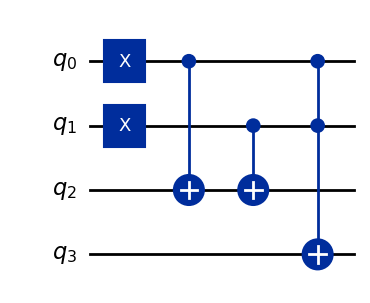

In [10]:
ha = QuantumCircuit(4)
ha.x(0)  
ha.x(1)
ha.cx(0, 2)
ha.cx(1, 2)
ha.ccx(0, 1, 3)
ha.draw('mpl')  

In [11]:
state = Statevector.from_instruction(ha)
print("Statevector of the AND circuit:")
print(state)

Statevector of the AND circuit:
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [12]:
probabilities = state.probabilities_dict()
print("Measurement probabilities:")
print(probabilities)

Measurement probabilities:
{np.str_('1011'): np.float64(1.0)}


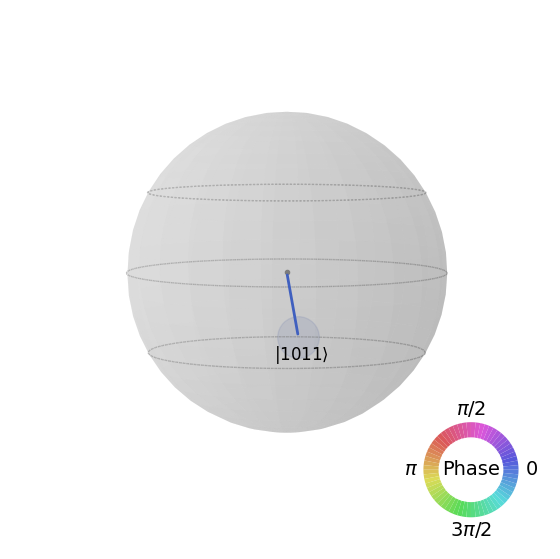

In [13]:
plot_state_qsphere(state.data)

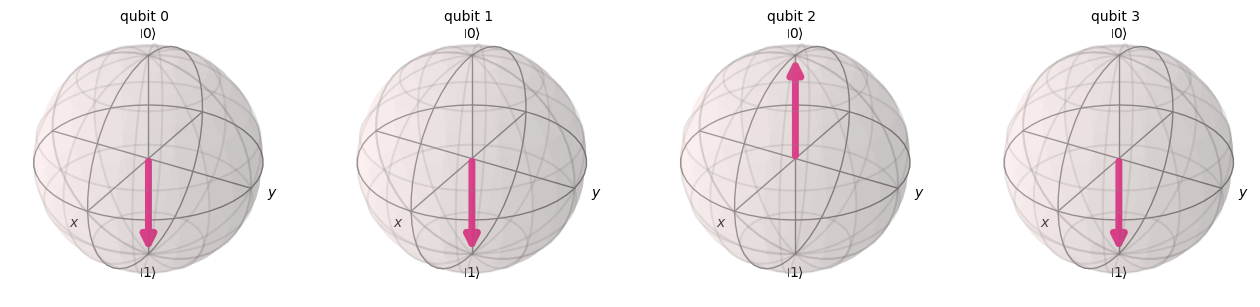

In [14]:
plot_bloch_multivector(state.data)

In [15]:
counts = state.sample_counts(shots=1024)
print("\nMeasurement Histogram:")
print(counts)


Measurement Histogram:
{np.str_('1011'): np.int64(1024)}


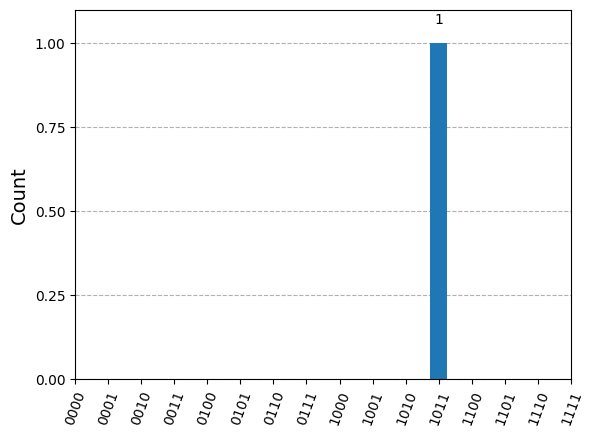

In [16]:
all_basis_states = [f"{i:04b}" for i in range(16)]
counts = state.probabilities_dict()
full_counts = {state: counts.get(state, 0) for state in all_basis_states}
plot_histogram(full_counts)

# FULL ADDER

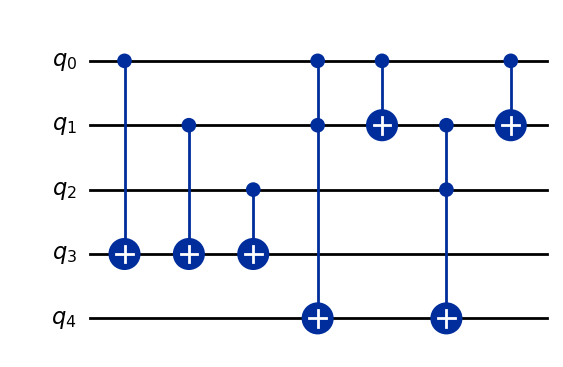

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_histogram

qc = QuantumCircuit(5)  
qc.cx(0, 3)  # CNOT: x ⊕ S
qc.cx(1, 3)  # CNOT: y ⊕ S
qc.cx(2, 3)  # CNOT: Cin ⊕ S

qc.ccx(0, 1, 4)  # Toffoli: x AND y → Cout
qc.cx(0, 1)  # Intermediate XOR (x ⊕ y) stored in y
qc.ccx(1, 2, 4)  # Toffoli: (x ⊕ y) AND Cin → Cout
qc.cx(0, 1)  # Undo intermediate XOR to preserve reversibility
qc.draw('mpl')

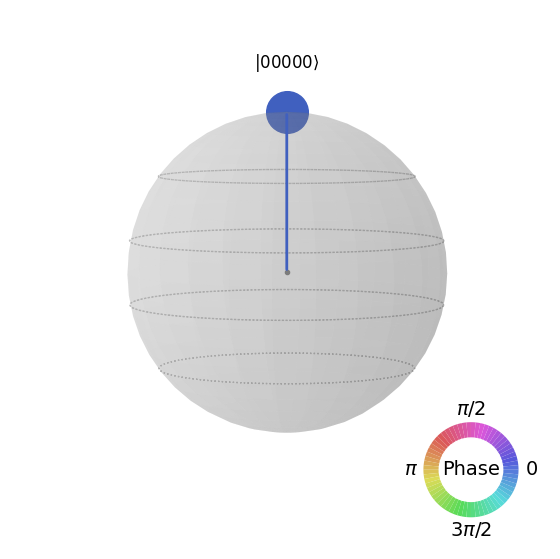

In [2]:
state = Statevector.from_instruction(qc)
plot_state_qsphere(state.data)

# HALF SUBTRACTOR

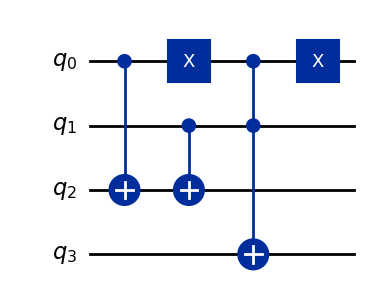

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(4)  
qc.cx(0, 2) 
qc.cx(1, 2)  
qc.x(0)       
qc.ccx(0, 1, 3) 
qc.x(0)      
qc.draw('mpl') 

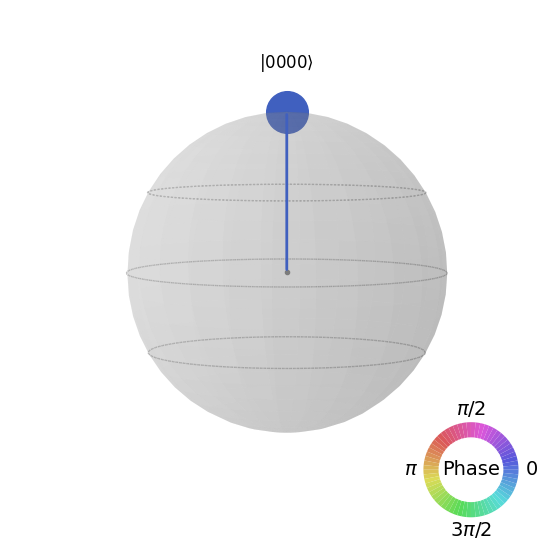

In [5]:
state = Statevector.from_instruction(qc)
plot_state_qsphere(state.data)  

# FULL SUBTRACTOR

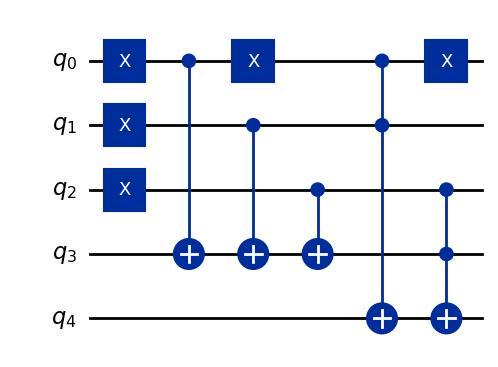

In [20]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Create a 5-qubit quantum circuit
qc = QuantumCircuit(5)  # Qubits: x, y, B_in, D (Difference), B_out (Borrow)
qc.x(0)
qc.x(1)
qc.x(2)
# Step 1: Compute Difference (D = x ⊕ y ⊕ B_in)
qc.cx(0, 3)  # CNOT: x ⊕ D
qc.cx(1, 3)  # CNOT: y ⊕ D
qc.cx(2, 3)  # CNOT: B_in ⊕ D

# Step 2: Compute Borrow-out (B_out)
qc.x(0)       # NOT(x) (to compute NOT(x) AND y)
qc.ccx(0, 1, 4)  # Toffoli: (NOT(x) AND y) → Borrow
qc.ccx(3, 2, 4)  # Toffoli: (NOT(D) AND B_in) → Borrow
qc.x(0)       # Undo NOT(x) to preserve reversibility

qc.draw('mpl')  # Draw circuit

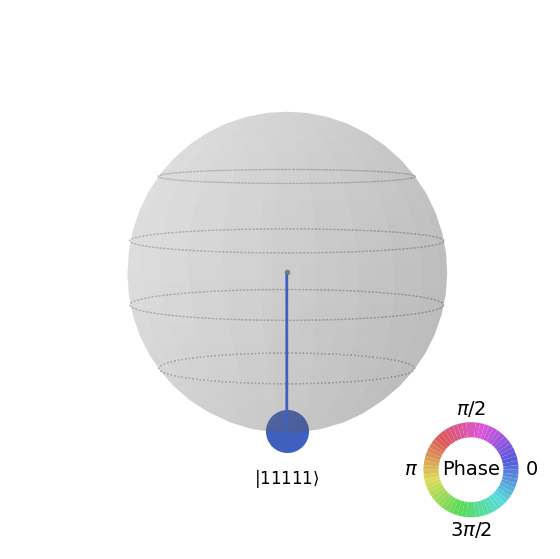

In [21]:
state = Statevector.from_instruction(qc)
plot_state_qsphere(state.data)  